<a href="https://colab.research.google.com/github/Priyam023002/ROKO1845/blob/main/Audio_processing_using_Librosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

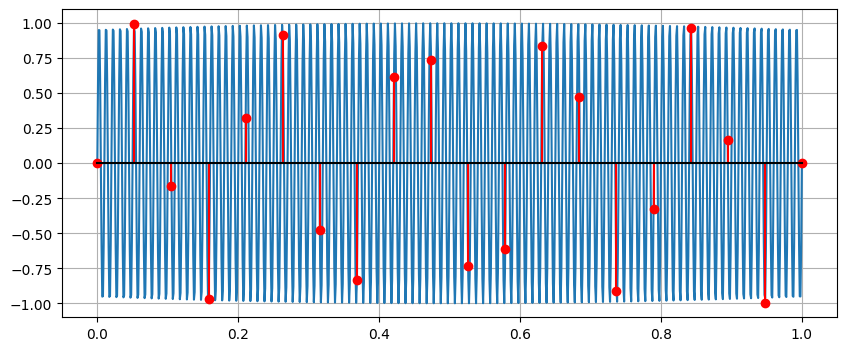

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,1,1000)

analog_signal = np.sin(2*np.pi*100*t)

sampled_t = np.linspace(0,1,20)
sampled_signal = np.sin(2*np.pi*5*sampled_t)

plt.figure(figsize=(10,4))
plt.plot(t,analog_signal)

plt.stem(sampled_t,sampled_signal,linefmt='r-',markerfmt='ro',basefmt='k-')
plt.grid()
plt.show()




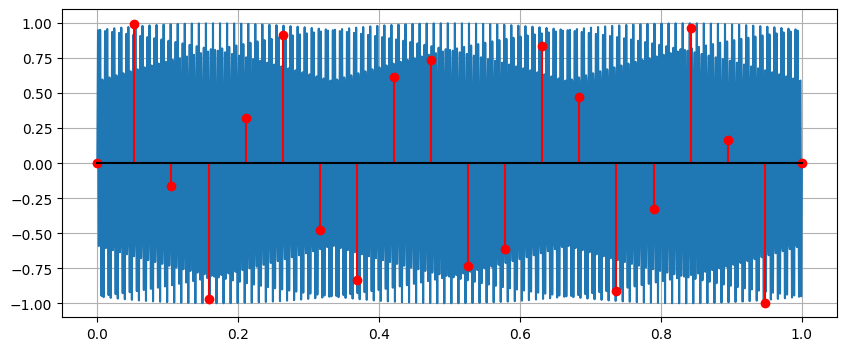

In [ ]:
t = np.linspace(0,1,1000)

analog_signal = np.sin(2*np.pi*300*t)

sampled_t = np.linspace(0,1,20)
sampled_signal = np.sin(2*np.pi*100*sampled_t)

plt.figure(figsize=(10,4))
plt.plot(t,analog_signal)

plt.stem(sampled_t,sampled_signal,linefmt='r-',markerfmt='ro',basefmt='k-')
plt.grid()
plt.show()


In [ ]:
import librosa
import librosa.display
from IPython.display import Audio

y, sr= librosa.load(librosa.ex('trumpet'))
Audio(y,rate=sr)


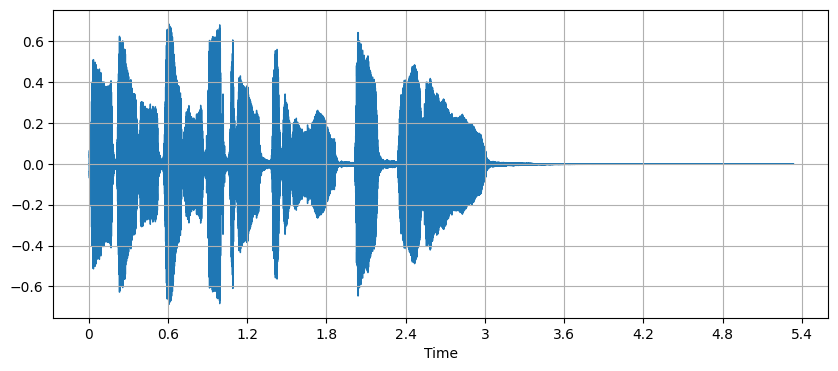

In [ ]:
plt.figure(figsize=(10,4))
librosa.display.waveshow(y,sr=sr)
plt.grid()
plt.show()

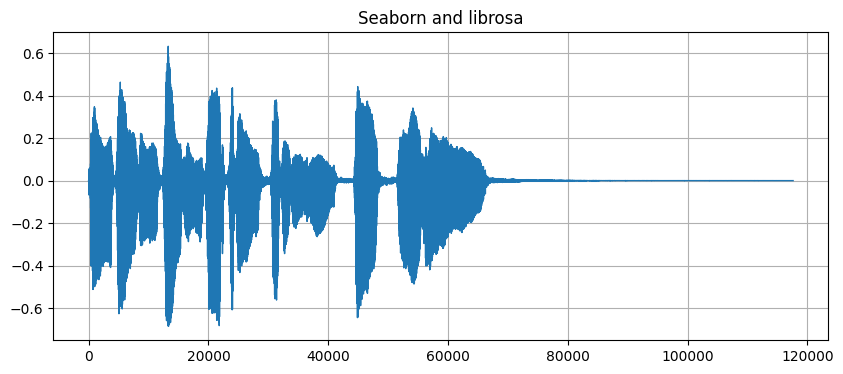

In [ ]:
import seaborn as sns
import pandas as pd

color_pal=sns.color_palette()
pd.Series(y).plot(figsize=(10,4),lw=1,title='Seaborn and librosa',color=color_pal[0])

plt.grid()
plt.show()

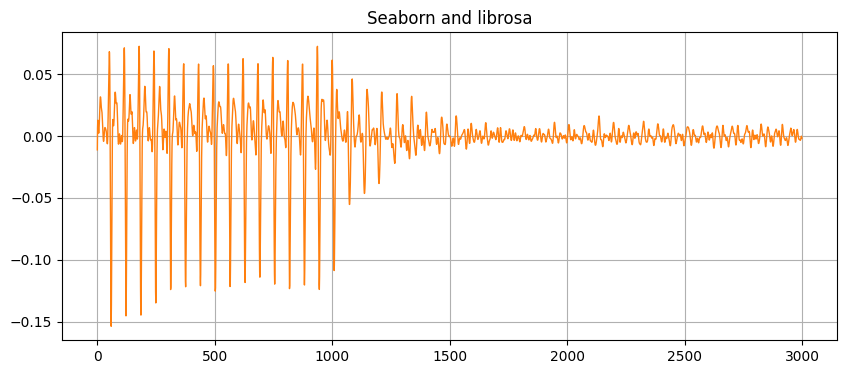

In [ ]:
y_trimmed,_ = librosa.effects.trim(y,top_db = 20)

pd.Series(y_trimmed[40000:43000]).plot(figsize=(10,4),lw=1,title='Seaborn and librosa',color=color_pal[1])

plt.grid()
plt.show()

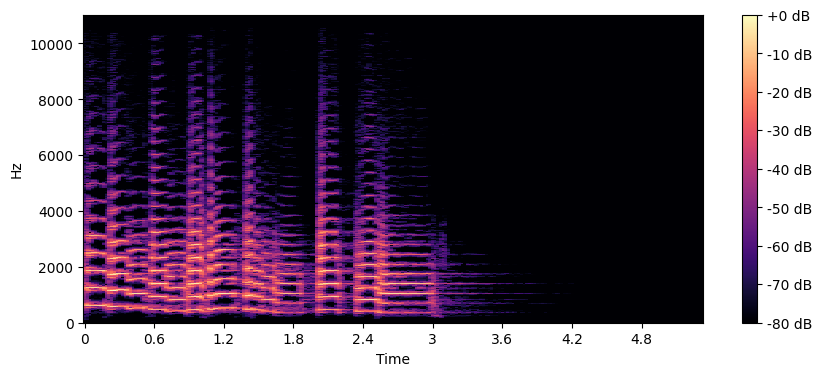

In [ ]:
D=librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(D,sr=sr,x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')


plt.show()

In [ ]:
!pip install librosa soundfile --quiet

from IPython.display import Audio, display, Javascript
from google.colab import output
import io
import soundfile as sf

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader();
  reader.onloadend = () => resolve(reader.result);
  reader.readAsDataURL(blob);
});

var record = async function() {
  const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
  const mediaRecorder = new MediaRecorder(stream);
  let chunks = [];

  mediaRecorder.ondataavailable = e => chunks.push(e.data);
  mediaRecorder.start();

  await sleep(5000); // Record 5 seconds
  mediaRecorder.stop();

  const stopped = new Promise(resolve => mediaRecorder.onstop = resolve);
  await stopped;

  const blob = new Blob(chunks);
  const base64 = await b2text(blob);
  return base64;
}
"""

display(Javascript(RECORD))
data = output.eval_js('record()')

import base64, uuid
import io

audio_bytes = base64.b64decode(data.split(',')[1])
with open("my_voice.wav", "wb") as f:
    f.write(audio_bytes)

# Preview
Audio("my_voice.wav")




<IPython.core.display.Javascript object>

<ipython-input-34-6fcf02540f1e>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load("my_voice.wav")
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


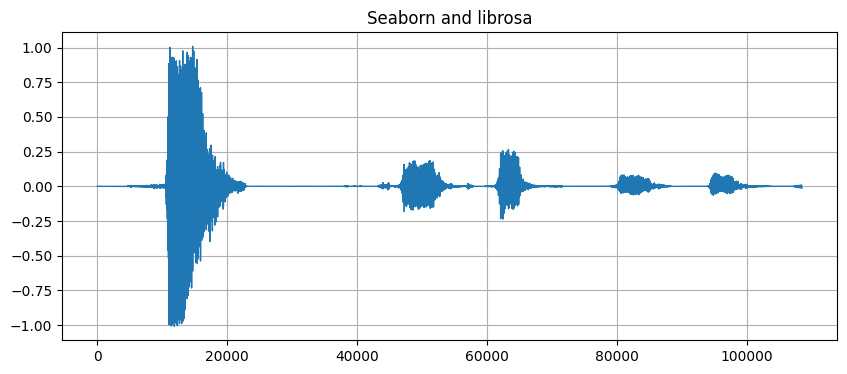

In [ ]:
y, sr = librosa.load("my_voice.wav")

pd.Series(y).plot(figsize=(10,4),lw=1,title='Seaborn and librosa',color=color_pal[0])

plt.grid()
plt.show()

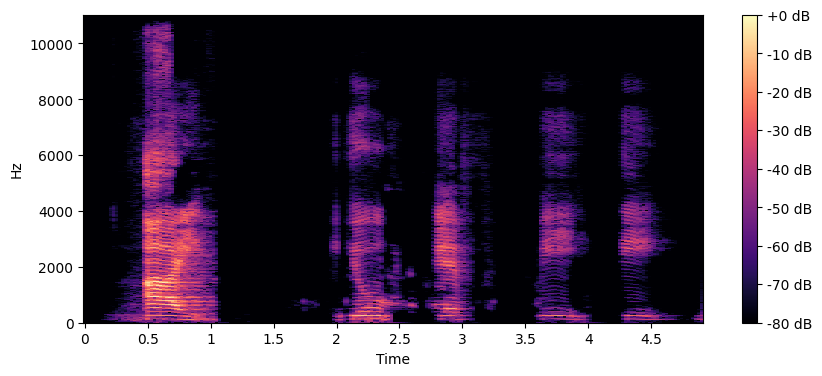

In [ ]:
D=librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(D,sr=sr,x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')


plt.show()

In [ ]:
#26 May Audio processing lecture 2 Sleep apnea

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from IPython.display import Audio, display

folder_path = '/content/drive/MyDrive/Sleep apnea/00000995-100507[004]'

In [ ]:
#Task, import one file and plot a waveform
import librosa
import librosa.display
from IPython.display import Audio
y, sr= librosa.load(librosa.ex('Respiratory_ObstructiveApnea_14208.5_14219.5'))
Audio(y,rate=sr)


plt.figure(figsize=(10,4))
librosa.display.waveshow(y,sr=sr)
plt.grid()
plt.show()


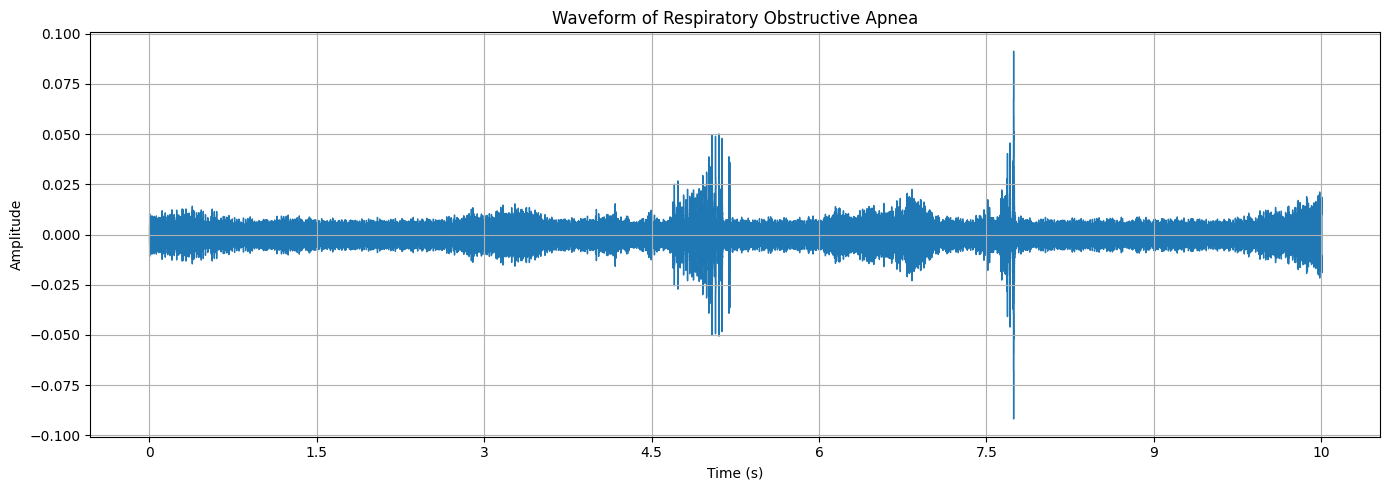

In [ ]:
audio_path = '/content/drive/MyDrive/Sleep Apnea/00000995-100507[004]/Respiratory_Hypopnea_12873.5_12884.0.wav'
y, sr = librosa.load(audio_path, sr=None)  # sr=None preserves the original sampling rate

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Respiratory Obstructive Apnea')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# STEP 3: Organize files by category and timestamps
file_structure = defaultdict(dict)
wav_files = [f for f in os.listdir("/content/drive/MyDrive/Sleep Apnea/00000995-100507[004]") if f.endswith('.wav')]

for f in wav_files:
    parts = f.replace('.wav', '').split('_')
    main_category = "_".join(parts[:2])
    timestamp = "_".join(parts[2:])  # e.g., 11912.5_11926.5
    full_path = os.path.join(folder_path, f)
    file_structure[main_category][timestamp] = full_path

# Map numbers to categories
category_map = {
    '1': 'Respiratory_Hypopnea',
    '2': 'Respiratory_ObstructiveApnea',
    '3': 'Respiratory_MixedApnea'
}




In [ ]:
# STEP 4: Feature display helper
def show_features(y, sr, title):
    print(" Playing audio:")
    display(Audio(y, rate=sr))

    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'{title} - Waveform')
    plt.tight_layout()
    plt.show()

    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} - Spectrogram')
    plt.tight_layout()
    plt.show()

    zcr = librosa.feature.zero_crossing_rate(y)
    mean_zcr = np.mean(zcr)
    print(f" Mean Zero Crossing Rate: {mean_zcr:.5f}")
    plt.figure(figsize=(10, 3))
    plt.plot(librosa.times_like(zcr), zcr[0])
    plt.title(f'{title} - Zero Crossing Rate')
    plt.tight_layout()
    plt.show()


In [ ]:
# STEP 5: Category Navigation

while True:
    print("\n Choose a category to explore:")
    print("1: Respiratory_Hypopnea")
    print("2: Respiratory_ObstructiveApnea")
    print("3: Respiratory_MixedApnea")
    print("q: Quit")

    choice = input("Enter choice (1/2/3/q): ").strip().lower()

    if choice == 'q':
        print("Exiting session.")
        break

    if choice not in category_map:
        print("❗ Invalid input. Please enter 1, 2, 3, or q.")
        continue

    selected_category = category_map[choice]
    subcats = sorted(file_structure[selected_category].items())

    print(f"\n Exploring: {selected_category} ({len(subcats)} segments)")

    for timestamp, file_path in subcats:
        print(f"\n Subcategory: {timestamp}")
        y, sr = librosa.load(file_path, sr=None)
        show_features(y, sr, f"{selected_category} | {timestamp}")

        proceed = input("Press Enter for next, or 'm' to go back to menu: ").strip().lower()
        if proceed == 'm':
            break  # Return to category selection




 Choose a category to explore:
1: Respiratory_Hypopnea
2: Respiratory_ObstructiveApnea
3: Respiratory_MixedApnea
q: Quit
Enter choice (1/2/3/q): 3

 Exploring: Respiratory_MixedApnea (1 segments)

 Subcategory: 14130.5_14141.0


<ipython-input-13-e774c1fde4a6>:27: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Sleep apnea/00000995-100507[004]/Respiratory_MixedApnea_14130.5_14141.0.wav'